**Custom Perceptron Code**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class XNORPerceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

**Train Data**

In [2]:
# XNOR gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 0, 0, 1])  # XNOR output

# Train (will not converge)
perceptron = XNORPerceptron(learning_rate=0.1, epochs=100)
perceptron.fit(X, y)

print("XNOR Gate (Single-Layer):")
print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)

XNOR Gate (Single-Layer):
Weights: [0.1 0. ]
Bias: -0.1


**Plotting**

/tmp/ipython-input-3-4108718044.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


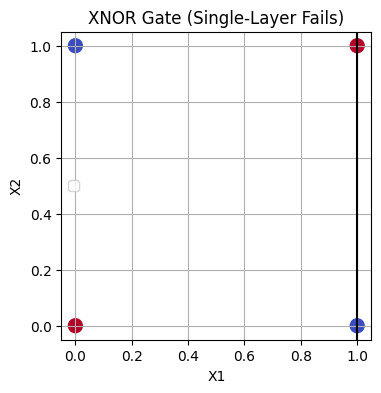


Failed Predictions:
Input: [0 0] -> Predicted: 0 (True: 1)
Input: [0 1] -> Predicted: 0 (True: 0)
Input: [1 0] -> Predicted: 1 (True: 0)
Input: [1 1] -> Predicted: 1 (True: 1)


In [3]:
# Plotting (shows failure)
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm')
xx = np.linspace(-0.5, 1.5, 100)
if perceptron.weights[1] != 0:
    yy = (-perceptron.weights[0] / perceptron.weights[1]) * xx - (perceptron.bias / perceptron.weights[1])
    plt.plot(xx, yy, 'k-', label='Failed Decision Boundary')
else:
    plt.axvline(x=-perceptron.bias/perceptron.weights[0], color='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XNOR Gate (Single-Layer Fails)")
plt.legend()
plt.grid()
plt.show()

# Test predictions (will be incorrect)
print("\nFailed Predictions:")
for i, x in enumerate(X):
    print(f"Input: {x} -> Predicted: {perceptron.predict([x])[0]} (True: {y[i]})")